In [53]:
%matplotlib inline
from pathlib import Path
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import os

# 7.2

In [54]:
# Directory

working_directory = os.getcwd()
print(working_directory)

/Users/pouyasohrab


In [55]:
# Defining the Data Frame

path = working_directory + '/dmba/UniversalBank.csv'
df = pd.read_csv(path)

In [56]:
# Remove columns

predictors = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education_1', 'Education_2', 'Education_3',
              'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

outcome = 'Personal Loan'

df['Education'] = df['Education'].astype('category')

# Create dummy variables

df = pd.get_dummies(df, prefix_sep='_', drop_first=False)

# Split the data

train_df, valid_df = train_test_split(df, test_size=0.4, random_state=1)


In [57]:
# Scale Variables

scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])
#scaler.transform(train_df[predictors])
# Transform the predictors of training, validation and newCustomer
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]

In [58]:
# KNN

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=1)

In [59]:
# Predict Data Frame

new_customer = pd.DataFrame(
    [{'Age': 40, 'Experience': 10, 'Income': 84, 'Family': 2, 'CCAvg': 2, 'Education_1': 0, 'Education_2': 1,
      'Education_3': 0, 'Mortgage': 0, 'Securities Account': 0, 'CD Account': 0, 'Online': 1, 'CreditCard': 1}]
)

# Scale new data

new_customer = scaler.transform(new_customer)

# Predict

prediction = knn.predict(new_customer)

# Loop

if prediction == 1:
    print("Classified as accepting the loan")
else:
    print("Classified as not accepting the loan")

Classified as not accepting the loan


In [60]:
classificationSummary(valid_y, knn.predict(valid_X))

Confusion Matrix (Accuracy 0.9545)

       Prediction
Actual    0    1
     0 1785   22
     1   69  124


In [61]:
#b.

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train a classifier for different values of k

results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    accuracy = accuracy_score(valid_y, knn.predict(valid_X))
    results.append({'k': k, 'accuracy': accuracy})

# Convert results to a pandas data frame

results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1    0.9545
1    2    0.9500
2    3    0.9535
3    4    0.9495
4    5    0.9565
5    6    0.9495
6    7    0.9520
7    8    0.9460
8    9    0.9475
9   10    0.9435
10  11    0.9465
11  12    0.9435
12  13    0.9450
13  14    0.9435


In [62]:
results.sort_values(by='accuracy', ascending=False)

,k,accuracy
4,5,0.9565
0,1,0.9545
2,3,0.9535
6,7,0.9520
1,2,0.9500
3,4,0.9495
5,6,0.9495
8,9,0.9475
10,11,0.9465
7,8,0.9460


In [63]:
#c.

# Retrain with full dataset for 5 neighbors

knn = KNeighborsClassifier(n_neighbors=5).fit(train_X, train_y)

# Predict the class for the new customer using the transformed new customer data

predicted_class = knn.predict(new_customer)
print(predicted_class)

[0]


In [64]:
# Generate the classification report for the validation data

classification_r = classificationSummary(valid_y, knn.predict(valid_X))
print(classification_r)

Confusion Matrix (Accuracy 0.9565)

       Prediction
Actual    0    1
     0 1803    4
     1   83  110
None


In [65]:
print('Confusion Matrix \n', confusion_matrix(valid_y, knn.predict(valid_X)))

Confusion Matrix 
 [[1803    4]
 [  83  110]]


In [66]:
print('Accuracy :', accuracy_score(valid_y, knn.predict(valid_X)))

Accuracy : 0.9565


In [67]:
#d.

# New data

customer_data = pd.DataFrame([{'Age': 40, 'Experience': 10, 'Income': 84, 'Family': 2, 'CCAvg': 2, 'Education_1': 0,
                               'Education_2': 1, 'Education_3': 0, 'Mortgage': 0, 'Securities Account': 0,
                               'CD Account': 0, 'Online': 1, 'CreditCard': 1}])

# Scale data

customer_data = scaler.transform(customer_data)

# Predict class

predicted_class = knn.predict(customer_data)

print("Classified as:", predicted_class)

Classified as: [0]


In [68]:
if prediction == 1:
    print("Classified as accepting the loan")
else:
    print("Classified as not accepting the loan")

Classified as not accepting the loan


In [69]:
#e.

from sklearn.metrics import confusion_matrix

# Repartition the data

train_df, tp_df = train_test_split(df, test_size=0.5, random_state=1)
valid_df, test_df = train_test_split(tp_df, test_size=0.4, random_state=1)



In [70]:
# Scale Variables

scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])
#scaler.transform(train_df[predictors])
# Transform the predictors of training, validation and newCustomer
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]
test_X = scaler.transform(test_df[predictors])
test_y = test_df[outcome]

In [71]:
# k-NN method

knn = KNeighborsClassifier(n_neighbors=1).fit(train_X, train_y)

In [72]:
# Generate the classification report for the training data

classification_r = classificationSummary(train_y, knn.predict(train_X))
print(classification_r)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2259    0
     1    0  241
None


In [73]:
# Generate the classification report for the validation data

classification_r = classificationSummary(valid_y, knn.predict(valid_X))
print(classification_r)

Confusion Matrix (Accuracy 0.9553)

       Prediction
Actual    0    1
     0 1333   16
     1   51  100
None


In [74]:
# Generate the classification report for the test data

classification_r = classificationSummary(test_y, knn.predict(test_X))
print(classification_r)

Confusion Matrix (Accuracy 0.9570)

       Prediction
Actual   0   1
     0 897  15
     1  28  60
None


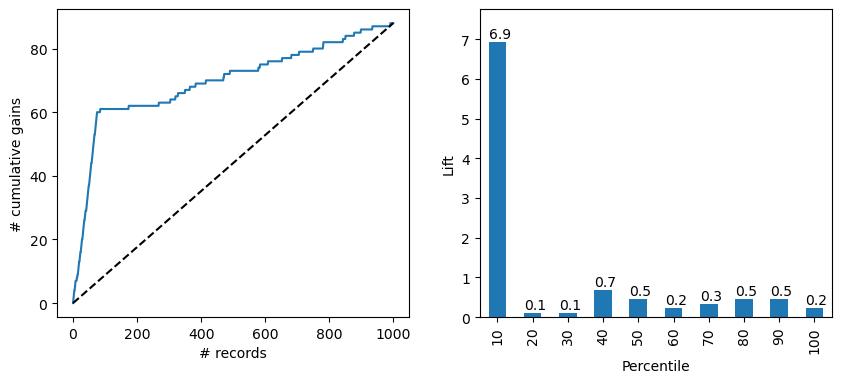

In [75]:
%matplotlib inline
proba = knn.predict_proba(test_X)
result = pd.DataFrame({'actual': test_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': knn.predict(test_X) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.show()

In the 10th percentile, the model performs 6.9 times better than the baseline. The training set has better accuracy results but that is to be expected since it was trained on the training set. The validation set shows 95% accuracy which is relatively accurate.

# 7.2 - Revised (NEW)

In [76]:
# Defining the Data Frame

path = working_directory + '/dmba/UniversalBank.csv'
df3 = pd.read_csv(path)

In [77]:
# Remove columns

predictors = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education_1', 'Education_2', 'Education_3',
              'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

outcome = 'Personal Loan'

df3['Education'] = df3['Education'].astype('category')

# Create dummy variables

df3 = pd.get_dummies(df3, prefix_sep='_', drop_first=False)

In [78]:
# Repartition the data

train_df, tp_df = train_test_split(df3, test_size=0.5, random_state=1)
valid_df, test_df = train_test_split(tp_df, test_size=0.4, random_state=1)

# Scale Variables

scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])
#scaler.transform(train_df[predictors])
# Transform the predictors of training, validation and newCustomer
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]
test_X = scaler.transform(test_df[predictors])
test_y = test_df[outcome]

print(train_df.shape, valid_df.shape, test_df.shape)

(2500, 16) (1500, 16) (1000, 16)


In [80]:
# Retrain

knnew = KNeighborsClassifier(n_neighbors=1).fit(train_X, train_y)

# Predict the class for the new customer using the transformed new customer data

predicted_class = knnew.predict(new_customer)
print(predicted_class)

# Loop

if prediction == 1:
    print("Classified as accepting the loan")
else:
    print("Classified as not accepting the loan")

[0]
Classified as not accepting the loan


In [81]:
results = []

for k in range(1,15):
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=train_X, y=train_y, cv=kfold)
    results.append({
        'k':k, 'mean accuracy' : f'{scores.mean():.2%}', 'sd' : f'{scores.std():.2%}'
    })
    
results = pd.DataFrame(results)
print(results)

     k mean accuracy     sd
0    1        95.68%  1.45%
1    2        95.56%  1.28%
2    3        96.08%  0.91%
3    4        95.72%  1.25%
4    5        96.04%  1.03%
5    6        95.40%  1.20%
6    7        95.52%  1.09%
7    8        95.12%  1.43%
8    9        95.20%  1.26%
9   10        94.68%  1.43%
10  11        95.08%  1.29%
11  12        94.80%  1.29%
12  13        95.16%  1.44%
13  14        94.68%  1.28%


In [82]:
results.sort_values(by='mean accuracy', ascending=False)

,k,mean accuracy,sd
2,3,96.08%,0.91%
4,5,96.04%,1.03%
3,4,95.72%,1.25%
0,1,95.68%,1.45%
1,2,95.56%,1.28%
6,7,95.52%,1.09%
5,6,95.40%,1.20%
8,9,95.20%,1.26%
12,13,95.16%,1.44%
7,8,95.12%,1.43%


In [83]:
newknn = KNeighborsClassifier(n_neighbors=3)
newknn.fit(train_X, train_y)

classificationSummary(valid_y, newknn.predict(valid_X))

Confusion Matrix (Accuracy 0.9547)

       Prediction
Actual    0    1
     0 1343    6
     1   62   89


In [84]:
# Predict the class for the new customer using the transformed new customer data

predicted_class = newknn.predict(customer_data)
print(predicted_class)

# Loop

if prediction == 1:
    print("Classified as accepting the loan")
else:
    print("Classified as not accepting the loan")

[0]
Classified as not accepting the loan


# 7.3

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Defining the Data Frame

path2 = working_directory + '/dmba/BostonHousing.csv'
df2 = pd.read_csv(path2)

In [86]:
df2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [87]:
df2 = pd.get_dummies(df2.drop(columns='CAT. MEDV'), drop_first=False)
housetraindf, housevalidf = train_test_split(df2, test_size=0.4, random_state=1)
print(housetraindf.shape, housevalidf.shape)

(303, 13) (203, 13)


In [88]:
# Predictors and Target Variable

target = 'MEDV'
predictors = list(df2.columns)
predictors.remove(target)
scaler = preprocessing.StandardScaler()

#predictors = df2.iloc[:, :-1]
#predictors = df2.drop(['MEDV', 'CAT.MEDV'])
#exclude = ['MEDV', 'CAT. MEDV']
#predictors = df2.drop(exclude, axis=1)
#target = df2['MEDV']

In [89]:
# Numerical Variables

numerical_vars = df2.select_dtypes(include=['int', 'float'])
print(numerical_vars)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.

In [90]:
scaler.fit(housetraindf[predictors])
#scaler.transform(train_df[predictors])
# Transform the predictors of training, validation and newCustomer
train_X = scaler.transform(housetraindf[predictors])
train_y = housetraindf[target]
valid_X = scaler.transform(housevalidf[predictors])
valid_y = housevalidf[target]

In [92]:
# Split the data

#train_X, valid_X, train_y, valid_y = train_test_split(normalized_predictors, target, test_size=0.4, random_state=1)

In [93]:
#a.

# Train a classifier for different values of k

results = []
for k in range(1, 6):
    knn = KNeighborsRegressor(n_neighbors=k).fit(train_X, train_y)
    mse = mean_squared_error(valid_y, knn.predict(valid_X))
    results.append({'k': k, 'MSE': mse})

# Convert results to a pandas data frame

results = pd.DataFrame(results)
print(results)

   k        MSE
0  1  29.194877
1  2  22.834655
2  3  21.825725
3  4  22.936616
4  5  25.148451


In [94]:
# Sort

results.sort_values(by='MSE', ascending=True)

,k,MSE
2,3,21.825725
1,2,22.834655
3,4,22.936616
4,5,25.148451
0,1,29.194877


In [95]:
#b.

# New Date Frame to predict

medv_predict = pd.DataFrame([{'CRIM': 0.2, 'ZN': 0, 'INDUS': 7, 'CHAS': 0, 'NOX': 0.538, 'RM': 6,
                               'AGE': 62, 'DIS': 4.7, 'RAD': 4, 'TAX': 307,
                               'PTRATIO': 21, 'LSTAT': 10}])

# Scale and transform

medv_predict = scaler.transform(medv_predict)

# Use best neighbors

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(train_X, train_y)

# Predict the class for the customer

predicted_medv = knn.predict(medv_predict)

print("The MEDV is predicted as:", predicted_medv)

The MEDV is predicted as: [18.76666667]


In [96]:
# c.

# Print performance measures (training data)

regressionSummary(train_y, knn.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.4825
       Root Mean Squared Error (RMSE) : 3.3686
            Mean Absolute Error (MAE) : 2.0022
          Mean Percentage Error (MPE) : -0.7924
Mean Absolute Percentage Error (MAPE) : 9.3879


In [97]:
# Print performance measures (validation data)

regressionSummary(valid_y, knn.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.8637
       Root Mean Squared Error (RMSE) : 4.6718
            Mean Absolute Error (MAE) : 2.9856
          Mean Percentage Error (MPE) : -0.5705
Mean Absolute Percentage Error (MAPE) : 13.1491


These regression summaries suggest that the model is performing well on the training data but not able to generalize to new data. I believe it to be overly fitting to the patterns and noise in the training data, resulting in an optimistic data error.

# 7.3.e

Using k-NN prediction for predicting MEDV for several thousands of new tracts has a few disadvantages. The k-NN algorithm's is very complex and requires a lot of time consuming distance calculations for each prediction. Additionally, k-NN stores the whole training dataset into memory, which causes it to be very memory intensive and causes slower processing. The operations that the algorithm goes through to create each prediction is:
Calculates the Euclidean distance between the new tract and every training data point. Then, it will sort the distances in ascending order to find the k nearest neighbors. Finally, it will make predictions based on the majority class or average of the of the k nearest neighbors for the target variable.